In [1]:
import os
import numpy as np
import json
from PIL import Image
import IPython
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy
from scipy.spatial import distance
from scipy.linalg import norm
from tqdm.notebook import tqdm

In [2]:
user_profile = os.environ['HOME']

# set the path to the downloaded data: 
data_path = '%s/data/EE148/RedLights2011_Medium' % user_profile

# get sorted list of files: 
file_names = sorted(os.listdir(data_path)) 

# remove any non-JPEG files: 
file_names = [f for f in file_names if '.jpg' in f] 

In [4]:
def show_img(I, rect_list):
    # Create figure and axes
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    # Display the image
    ax.imshow(I)
    for rect in rect_list:
        tl_row, tl_col, br_row, br_col = rect
        # Create a Rectangle patch
        rect = patches.Rectangle((tl_col-1, tl_row-1), br_col-tl_col, br_row-tl_row,
                                 linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.show()

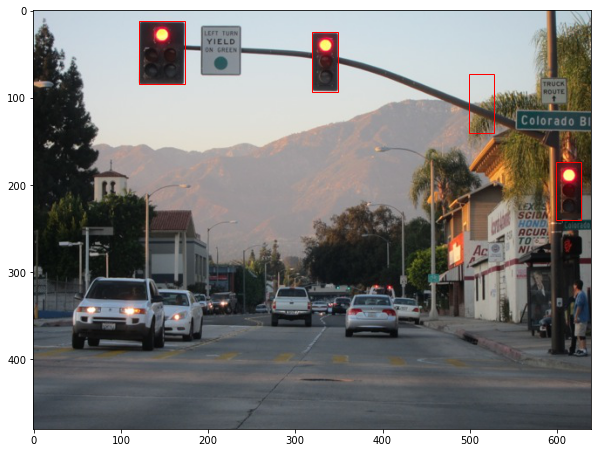

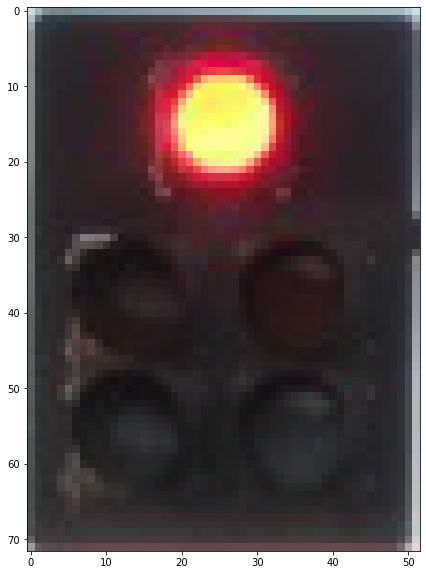

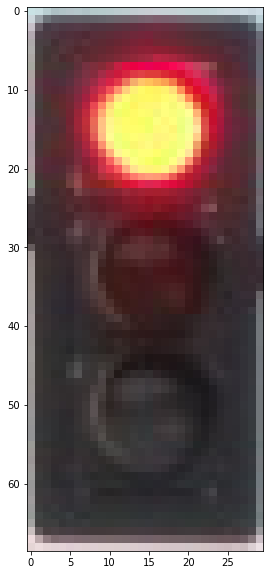

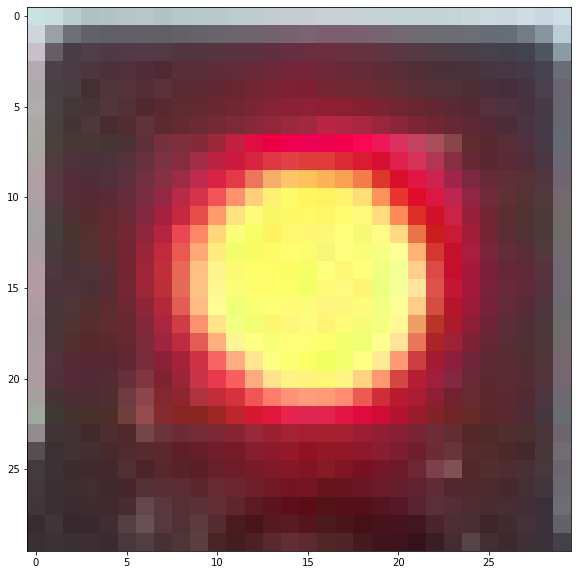

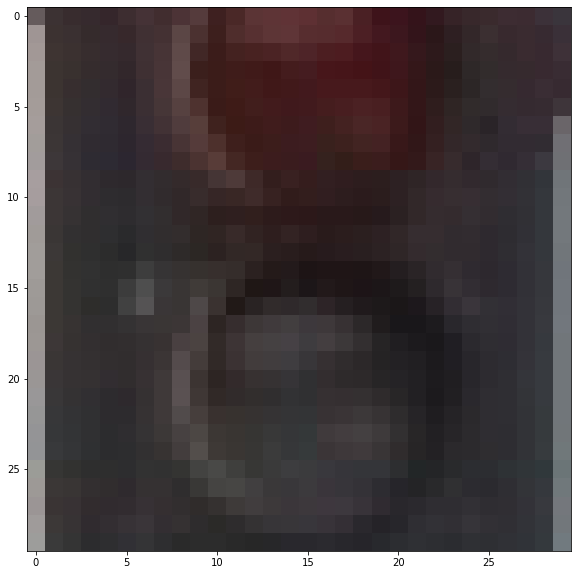

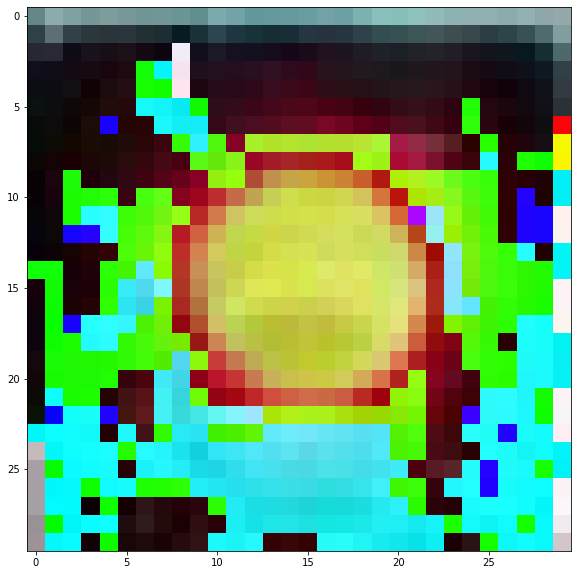

7524.469615859977


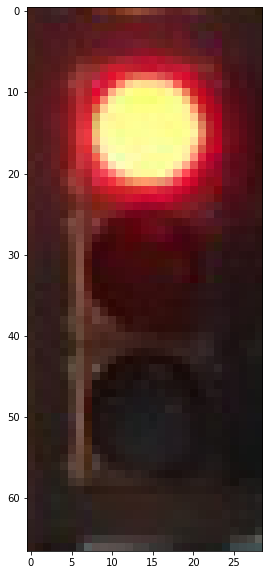

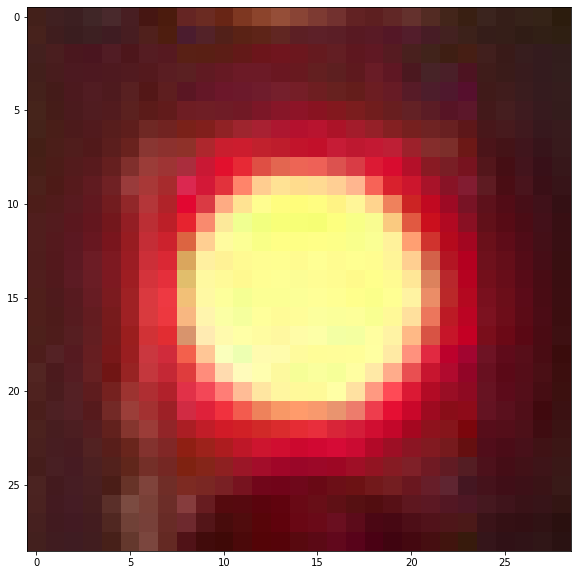

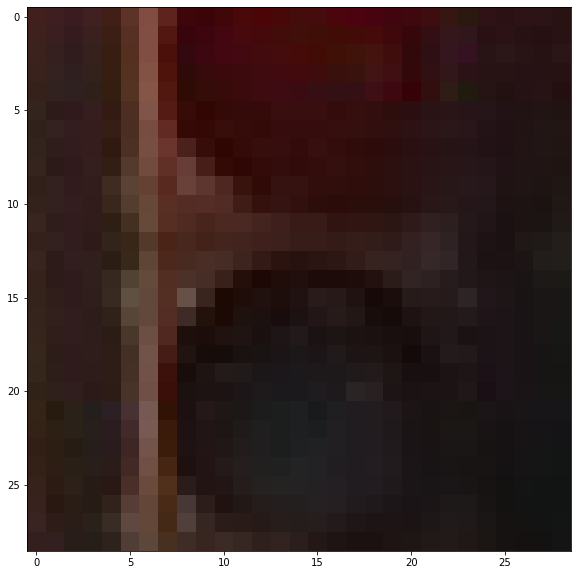

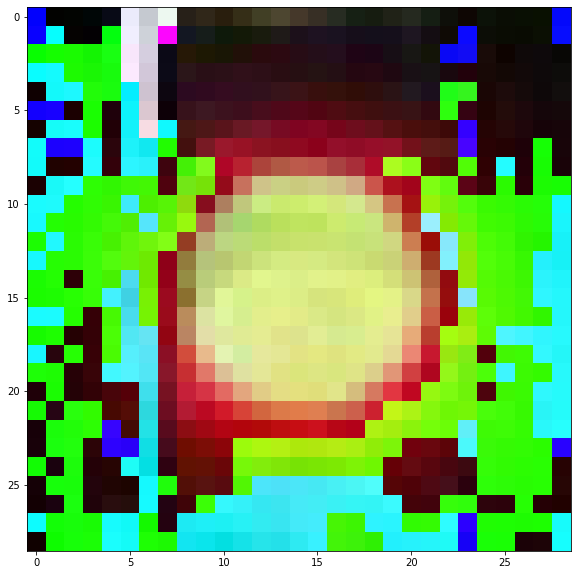

7233.799278387533


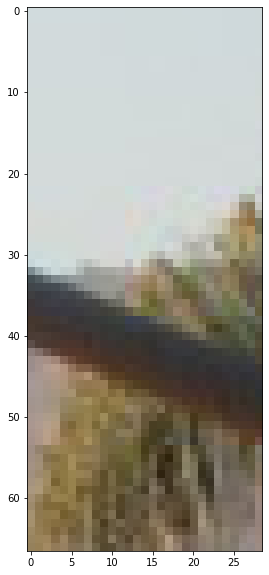

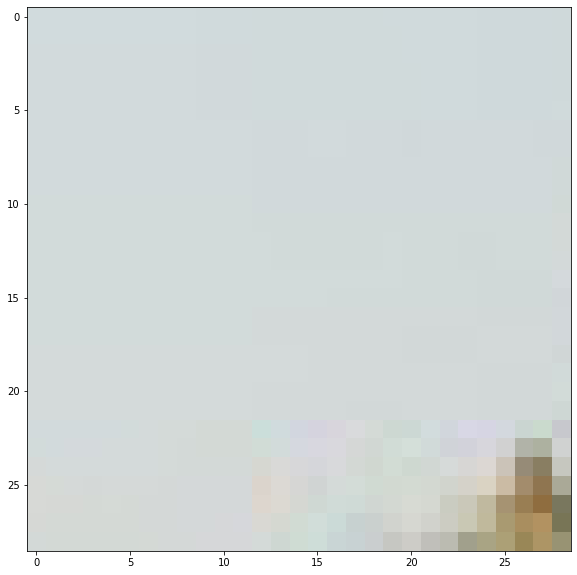

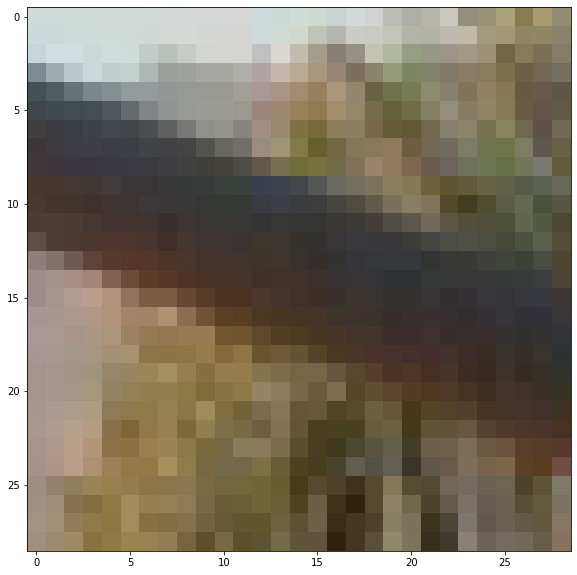

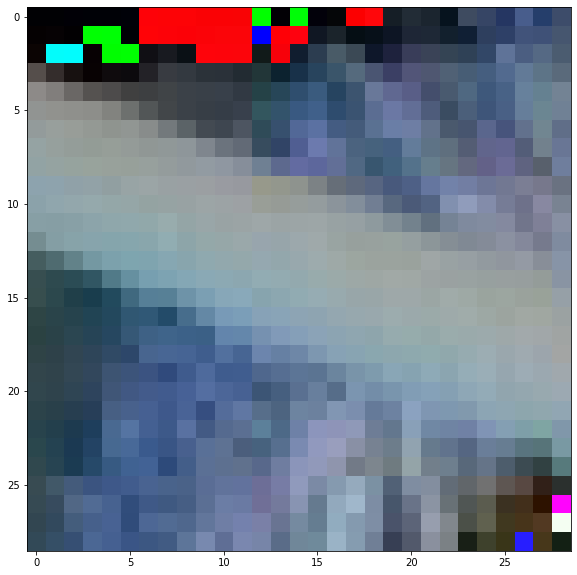

6360.136712367117


In [15]:
I = Image.open(os.path.join(data_path,file_names[9]))
I = np.asarray(I)
coords = []
coords.append([13, 122, 85, 174])
coords.append([25, 320, 94, 350])
coords.append([174, 600, 241, 629])
coords.append([174-100, 600-100, 241-100, 629-100])
show_img(I, coords)
for coord in coords:
    top_row, left_col, bot_row, right_col = coord
    show_img(I[top_row:bot_row, left_col:right_col, :], [])
    if top_row + (right_col - left_col)*2 < bot_row:
        a = I[top_row:top_row + (right_col - left_col), left_col:right_col, :]
        b = I[top_row + (right_col - left_col):top_row + (right_col - left_col)*2, left_col:right_col, :]
        show_img(a, [])
        show_img(b, [])
        show_img(a - b, [])
        dist_rgb = norm(a - b)
        print(dist_rgb)